## DS340W - Final Code
### Mitchell Wentzel


The following is my final code document for DS340W. I have done a complete rework of the original code source, and also added my new ideas for the novelty/ccreativity section as well. Below is a brief dictionary for easy access to the specific sections of the code document. They have also been split into code ideas that were taken from the original source and code ideas that I added to the document.

**AGENDA FOR NOTEBOOK:**

*Modified Original Code*

1. Introductory EDA

2. Disaster Frequency by State

3. Which States have Which Disasters?

4. Most Disaster Affected States

5. Most Disaster-Prone Affected Areas

6. Heat Map Analysis

*New Code - Novelty/Creativity*

7. Natural Disaster Time Series Analysis

8. Disaster Analysis using Machine Learning


# Introductory EDA

In [1]:
# Here, we load in packages, as well as connect to the main google drive, where
# the data set is being stored for easy access.

import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib as plt

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Mount your personal google drive, and store the data set in the main folder.

from google.colab import drive
drive.mount('drive')

Mounted at drive


In [2]:
# Load in the data set and save it as "file".

file = 'drive/My Drive/us_disaster_declarations.csv'

# Read in the data set using the csv read function, show the first few rows.

df = pd.read_csv(file)
df.head(10)

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,incident_begin_date,incident_end_date,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,hash,last_refresh,id
0,DR-1-GA,1,GA,DR,1953-05-02T04:00:00Z,1953,Tornado,Tornado,0,1,...,1953-05-02T04:00:00Z,1953-05-02T04:00:00Z,NaN,13000,0,Statewide,53013,2f28952448e0a666d367ca3f854c81ec,2019-07-26T18:49:32Z,5d1bceafd5b39c032f2602bf
1,DR-2-TX,2,TX,DR,1953-05-15T04:00:00Z,1953,Tornado,Tornado & Heavy Rainfall,0,1,...,1953-05-15T04:00:00Z,1953-05-15T04:00:00Z,NaN,48000,0,Statewide,53003,c5a1a4a1030d6730d9c562cdbe7c830f,2019-07-26T18:49:32Z,5d1bceafd5b39c032f2602c3
2,DR-3-LA,3,LA,DR,1953-05-29T04:00:00Z,1953,Flood,Flood,0,1,...,1953-05-29T04:00:00Z,1953-05-29T04:00:00Z,NaN,22000,0,Statewide,53005,745948932fd77a7c6dcd4de7059ff080,2019-07-26T18:49:32Z,5d1bceafd5b39c032f2602c1
3,DR-4-MI,4,MI,DR,1953-06-02T04:00:00Z,1953,Tornado,Tornado,0,1,...,1953-06-02T04:00:00Z,1953-06-02T04:00:00Z,NaN,26000,0,Statewide,53004,8c9dee13124e36a9dfe2eb74e33fafad,2019-07-26T18:49:32Z,5d1bceafd5b39c032f2602c0
4,DR-5-MT,5,MT,DR,1953-06-06T04:00:00Z,1953,Flood,Floods,0,1,...,1953-06-06T04:00:00Z,1953-06-06T04:00:00Z,NaN,30000,0,Statewide,53006,59c5483387ca13c6a3c1bc692f4860e1,2019-07-26T18:49:32Z,5d1bceafd5b39c032f2602c7
5,DR-6-MI,6,MI,DR,1953-06-09T04:00:00Z,1953,Tornado,Tornado,0,1,...,1953-06-09T04:00:00Z,1953-06-09T04:00:00Z,NaN,26000,0,Statewide,53007,d3ae03a5caa78ae1c8b6052e5e29a97d,2019-07-26T18:49:32Z,5d1bceafd5b39c032f2602c2
6,DR-8-IA,8,IA,DR,1953-06-11T04:00:00Z,1953,Flood,Flood,0,1,...,1953-06-11T04:00:00Z,1953-06-11T04:00:00Z,NaN,19000,0,Statewide,53008,e258e9dd25fac73939f59c8ffb5308f5,2019-07-26T18:49:32Z,5d1bceafd5b39c032f2602c4
7,DR-7-MA,7,MA,DR,1953-06-11T04:00:00Z,1953,Tornado,Tornado,0,1,...,1953-06-11T04:00:00Z,1953-06-11T04:00:00Z,NaN,25000,0,Statewide,53009,6bab17e16984fc75f61a8445df3e95d9,2019-07-26T18:49:32Z,5d1bceafd5b39c032f2602c9
8,DR-9-TX,9,TX,DR,1953-06-19T04:00:00Z,1953,Flood,Flood,0,1,...,1953-06-19T04:00:00Z,1953-06-19T04:00:00Z,NaN,48000,0,Statewide,53010,4485da27a9218458eb2d13a6c33a4c62,2019-07-26T18:49:32Z,5d1bceafd5b39c032f2602c6
9,DR-11-NH,11,NH,DR,1953-07-02T04:00:00Z,1953,Fire,Forest Fire,0,1,...,1953-07-02T04:00:00Z,1953-07-02T04:00:00Z,NaN,33000,0,Statewide,53011,86a70820dbb80e585cc01e2ce502005c,2019-07-26T18:49:32Z,5d1bceafd5b39c032f2602c5


In [3]:
# Produce the information summary of the data set.
# This helps us learn more about the data within the file.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59392 entries, 0 to 59391
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   fema_declaration_string     59392 non-null  object
 1   disaster_number             59392 non-null  int64 
 2   state                       59392 non-null  object
 3   declaration_type            59392 non-null  object
 4   declaration_date            59392 non-null  object
 5   fy_declared                 59392 non-null  int64 
 6   incident_type               59392 non-null  object
 7   declaration_title           59392 non-null  object
 8   ih_program_declared         59392 non-null  int64 
 9   ia_program_declared         59392 non-null  int64 
 10  pa_program_declared         59392 non-null  int64 
 11  hm_program_declared         59392 non-null  int64 
 12  incident_begin_date         59392 non-null  object
 13  incident_end_date           51226 non-null  ob

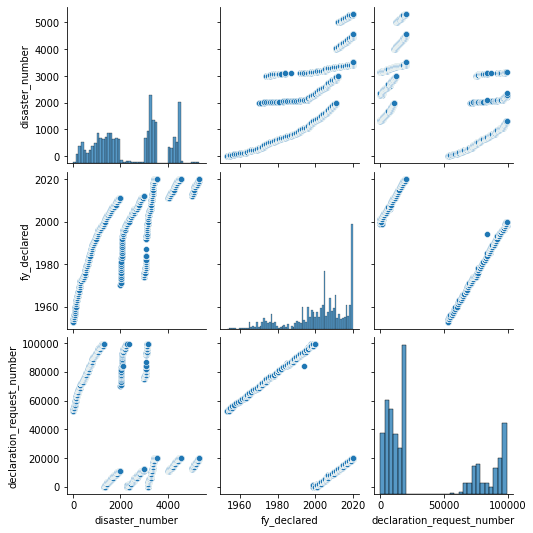

In [4]:
# Create a pairplot to compare the disaster instances, compared with
# declared instances.

sns.pairplot(df[['disaster_number','fy_declared','incident_type','declaration_request_number']]);

# Disaster Frequency by State

In [5]:
# Produce every type of storm that is represented in the data set.
# Then, produce the total instances of each in the data set.

disaster_types = df['incident_type'].unique()
print("Types of Disasters reported:\n\n", disaster_types)
print("Occurrences:\n\n",df['incident_type'].value_counts())

Types of Disasters reported:

 ['Tornado' 'Flood' 'Fire' 'Other' 'Earthquake' 'Hurricane' 'Volcano'
 'Severe Storm(s)' 'Toxic Substances' 'Typhoon' 'Drought'
 'Dam/Levee Break' 'Snow' 'Severe Ice Storm' 'Freezing' 'Coastal Storm'
 'Fishing Losses' 'Mud/Landslide' 'Human Cause' 'Terrorist' 'Tsunami'
 'Chemical' 'Biological']
Occurrences:

 Severe Storm(s)     17032
Hurricane           10880
Flood               10395
Biological           7645
Snow                 3659
Fire                 3334
Severe Ice Storm     1990
Tornado              1463
Drought              1292
Coastal Storm         572
Freezing              301
Other                 297
Earthquake            226
Typhoon               130
Volcano                51
Fishing Losses         42
Mud/Landslide          31
Dam/Levee Break        13
Toxic Substances        9
Tsunami                 9
Chemical                9
Human Cause             7
Terrorist               5
Name: incident_type, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


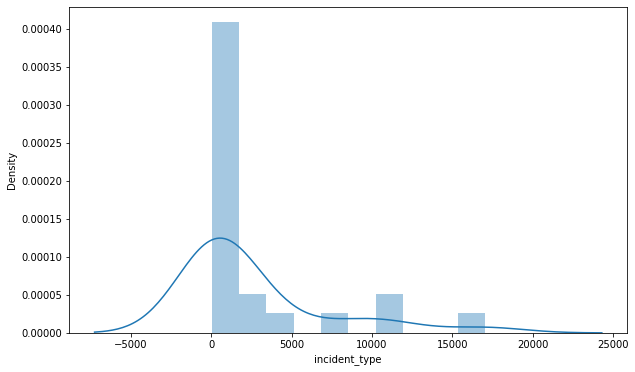

In [6]:
# Here we are plotting natural disasters over the years by count and frequency.

plt.pyplot.figure(figsize=(10,6))
sns.distplot(df['incident_type'].value_counts());

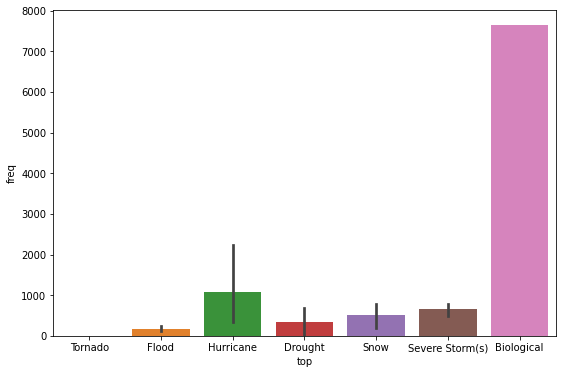

In [7]:
# Here we are plotting disaster frequency over the type of disaster.

m=df[['fy_declared','incident_type']].groupby('fy_declared').describe()['incident_type'].reset_index()
plt.pyplot.figure(figsize=(9,6))
sns.barplot(x='top',y='freq',data =m);

In [8]:
# Produce the total number of declared natural disasters by year.
# Order by most-to-least total declared disasters.

m=df['fy_declared'].value_counts().reset_index()
m.head(10)

,index,fy_declared
0,2020,8410
1,2005,4661
2,2011,2684
3,2008,2456
4,2019,1916
5,2017,1905
6,2004,1894
7,1993,1773
8,1996,1750
9,2003,1662


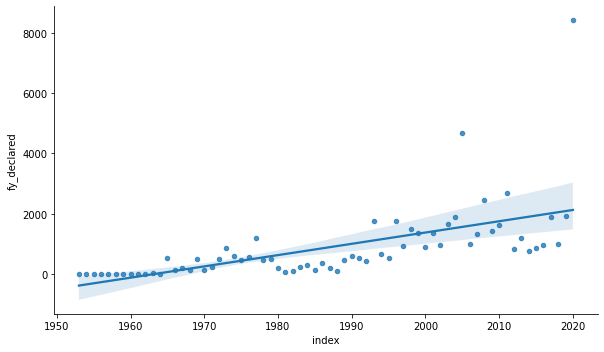

In [9]:
# Here we are plotting total declared disasters over the yearly index.

sns.lmplot(x='index',y='fy_declared',data=m.sort_values(by='fy_declared'),
           aspect=1.7, height=5,markers=['o'], scatter_kws={'s':20});

## Which States have Which Disasters?

In [10]:
# Here we will sort the data by state, total count of storm rreports, total 
# unique storms, type of storm and the storm frequency.

m=df[['state','incident_type']].groupby('state').describe()
m['incident_type'].sort_values(by='count',ascending=False).head(10)

,count,unique,top,freq
state,,,,
TX,4561,11,Fire,1216
MO,2767,8,Severe Storm(s),1406
VA,2460,10,Hurricane,877
KY,2417,10,Severe Storm(s),987
OK,2279,9,Severe Storm(s),997
GA,2240,10,Hurricane,884
FL,1969,10,Hurricane,930
NC,1848,10,Hurricane,1075
IA,1800,8,Flood,722


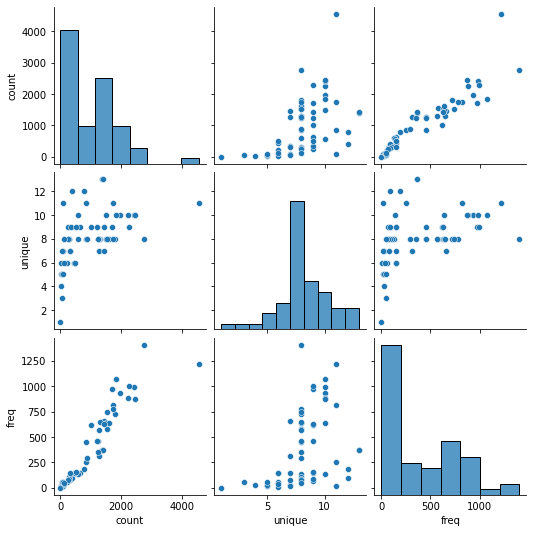

In [11]:
# Here we create another pairplot to compare total report counts, unique counts,
# and frequency counts. 

m=df[['state','incident_type']].groupby('state').describe()
sns.pairplot(m['incident_type'].reset_index(drop=True));

In [12]:
# This will return the disaster frequency by state, 
# and order from most-to-least.

m['incident_type'].sort_values(by='freq',ascending=False)['freq'].head(10)

state
MO    1406
TX    1216
NC    1075
OK     997
KY     987
KS     975
FL     930
GA     884
VA     877
LA     818
Name: freq, dtype: object

# Most Disaster Affected States

In [13]:
# This produces all reported disaster cases by state.

p = df[['state','incident_type']].groupby('state').count()
p.reset_index(inplace=True)
p=p.sort_values(by='incident_type',ascending=False).head(10)
p

,state,incident_type
50,TX,4561
28,MO,2767
52,VA,2460
20,KY,2417
41,OK,2279
12,GA,2240
10,FL,1969
32,NC,1848
15,IA,1800
21,LA,1751


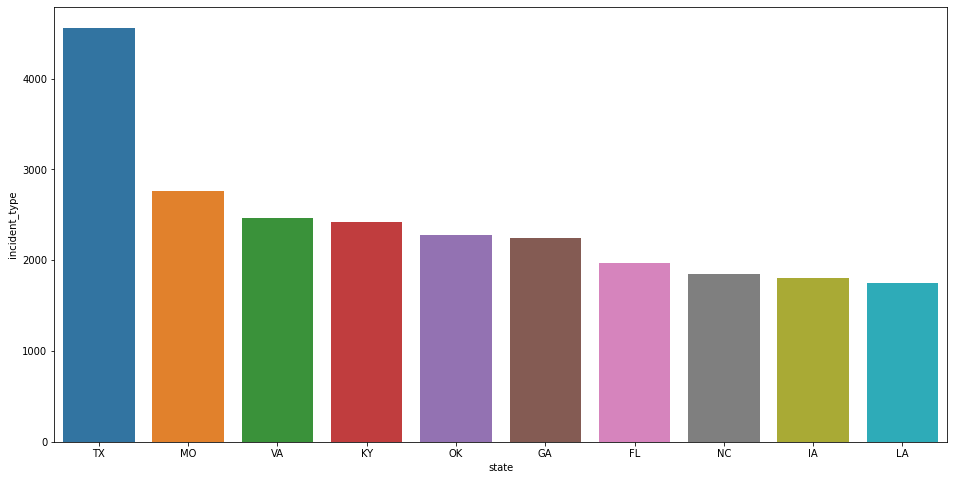

In [14]:
# This will create a visual plot to show the results of the
# data above.

plt.pyplot.figure(figsize=(16,8))
sns.barplot(x="state", y="incident_type", data=p,);

In [15]:
# Since Texas seems to have the most disaster occurances (as shown in the
# plot above), we will learn more about Texas disasters.

# This will produce the most frequent type of disaster in Texas.

print("Texas mostly faces:\n")
df[['state','incident_type']].groupby('state').max().loc['TX']

Texas mostly faces:



incident_type    Tornado
Name: TX, dtype: object

In [16]:
# The following will produce Texas's most frequent disaster years.

m=df.query('state=="TX"')['fy_declared'].value_counts().reset_index()
m.head(10)

,index,fy_declared
0,2005,763
1,2020,525
2,2008,476
3,1999,297
4,1998,293
5,2006,277
6,2011,261
7,2016,168
8,1993,153
9,2007,116


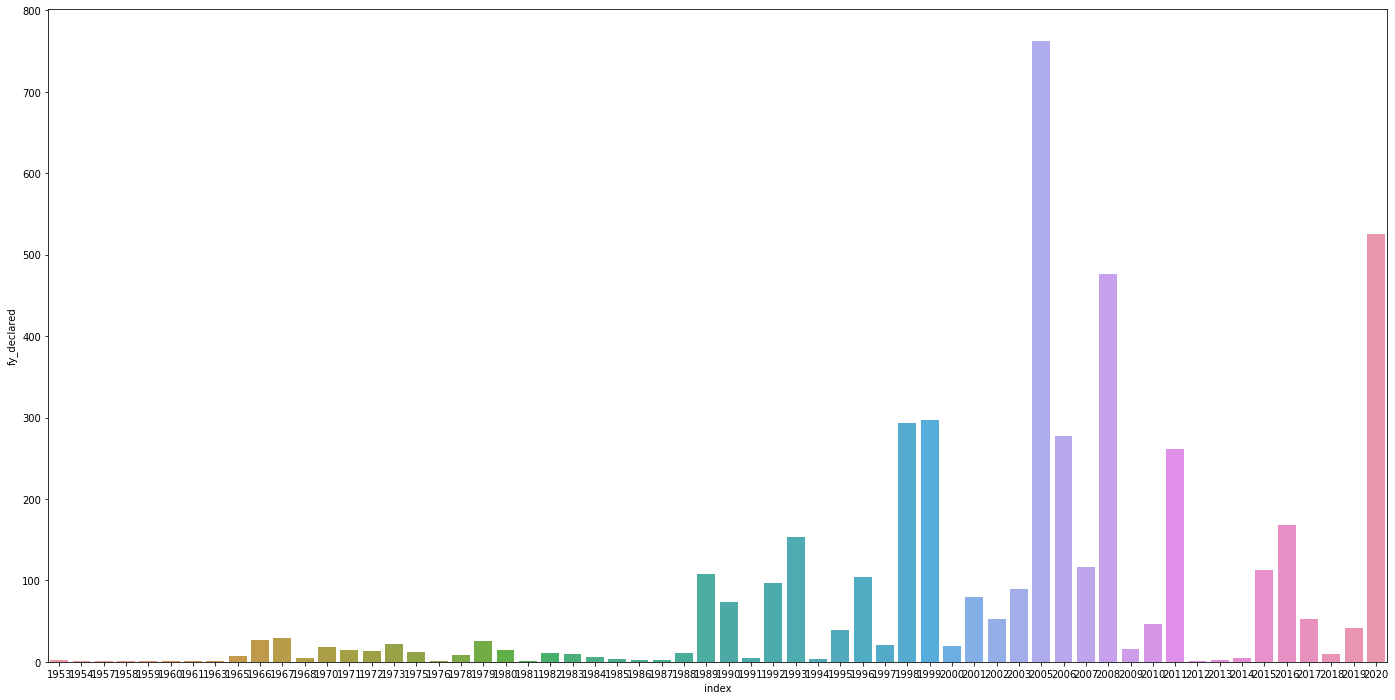

In [17]:
# The following will produce a plot to show the full results from the data 
# above. Plotting frequent disaster count in Texas by year.

plt.pyplot.figure(figsize=(24,12))
sns.barplot(x='index',y='fy_declared',data=m.sort_values(by='fy_declared'));

## Most Disaster-Prone Affected Areas

In [18]:
# This will return the total number of "affected areas".
# These are mostly sorted by state counties.

print("Total Affected Areas\n",df['designated_area'].nunique())

Total Affected Areas
 2766


In [19]:
# Now that we can see the total number of affected areas,
# we will produce the total number of disaster occurances by affected area,
# and order it by most-to-least disaster count.

df[['designated_area','incident_type']].groupby('designated_area').count().sort_values(by='incident_type',ascending=False).head(10)

,incident_type
designated_area,
Statewide,511
Washington (County),508
Jefferson (County),462
Jackson (County),440
Franklin (County),437
Lincoln (County),394
Montgomery (County),349
Clay (County),346
Madison (County),334


# Heat Map Analysis

In [20]:
# Before creating our heat, we must rework the declaration date variable,
# and change it to different columns for each date assessment.
# Year - Month - Day - Time

d = pd.to_datetime(df['declaration_date']).dt
df['year'] = d.year
df['month'] = d.month
df['day'] = d.day
df['time'] = d.time
del df['declaration_date']

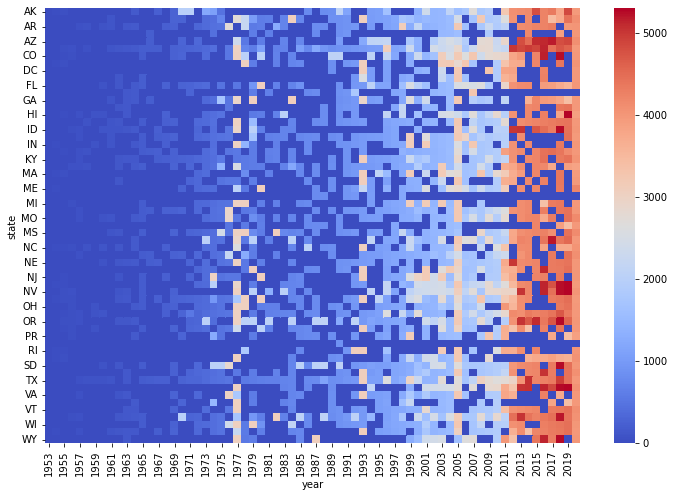

In [21]:
# Here, we create the most valuable plot in this exploratory data analysis
# for natural disaster data in the USA. This is a heat map that shows us 
# natural disaster frequency, by state, per year from 1953 - 2020.

pt = df.pivot_table(values ='disaster_number', index = 'state', columns = 'year').fillna(0)
plt.pyplot.figure(figsize=(12,8))
sns.heatmap(pt, cmap='coolwarm');
plt.pyplot.savefig('heatmap.png')

# Natural Disaster Time Series Analysis

For this section, I will make it so that any state can be analyzed with a slight change in code. I will be running the time series analysis in this document on Texas since it is the most disaster-prone state according to the earlier results of the exploratory data analysis.

In [22]:
# Re/Load in python packages, specific to the time series analysis.
# We will also set plotting options to produce more detailed plots.

import pandas_datareader.data as web
import datetime
import pandas as pd
import datetime
import pandas_datareader as web
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error

In [23]:
# First, we will limit our data set to only include disasters that
# occurred in Texas. Then we will sort by year and total disasters.

# ------- CHANGE STATE INDEX TO TEST OTHER STATES ----------------
p = df[(df['state'] == 'TX')]
p = p[['year','incident_type']].groupby('year').count()
p.reset_index(inplace=True)
p.head(10)

,year,incident_type
0,1953,2
1,1954,1
2,1957,1
3,1958,1
4,1959,1
5,1960,1
6,1961,1
7,1963,1
8,1965,7
9,1966,27


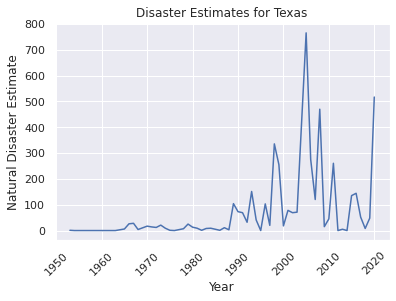

In [24]:
# Here, we create our initial time series plot to map out the total
# number of disaster-events that were declared in Texas each year,
# from 1953 - 2020.

sns.set()
plt.ylabel('Natural Disaster Estimate')
plt.xlabel('Year')
plt.xticks(rotation = 45)
plt.title("Disaster Estimates for Texas")
plt.plot(p['year'], p['incident_type'],)

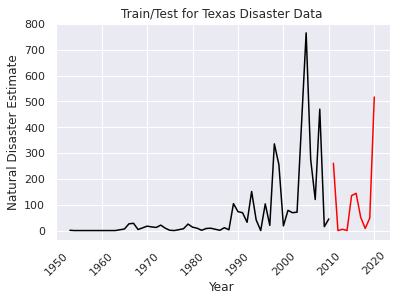

In [25]:
# Here, we will split the disaster data on Texas into a training and
# a testing set. We replicate the time series and split the data sets
# by color for easy analysis.

train = p.iloc[:50,]
test = p.iloc[50:,]
plt.plot(train['year'], train['incident_type'], color = "black")
plt.plot(test['year'], test['incident_type'], color = "red")
plt.ylabel('Natural Disaster Estimate')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.title("Train/Test for Texas Disaster Data")
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


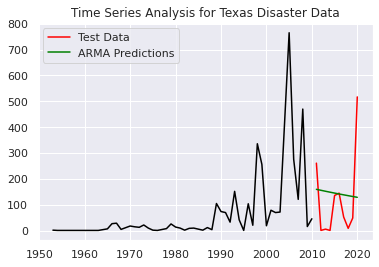

In [26]:
# Next, we will apply a SARIMAX fucntion to run an ARMA model on the training
# data set, to create prediction values for natural disaster estimation per year
# in Texas. 

from statsmodels.tsa.statespace.sarimax import SARIMAX
y = train['incident_type']
ARMAmodel = SARIMAX(y, order = (1, 0, 1))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test['year']
y_pred_out = y_pred_df["Predictions"]
plt.plot(train['year'], train['incident_type'], color = "black")
plt.plot(test['year'], test['incident_type'], color = "red", label = 'Test Data')
plt.plot(y_pred_out, color = 'green', label = 'ARMA Predictions')
plt.title("Time Series Analysis for Texas Disaster Data")
plt.legend()

In [27]:
# Here, we calculate an approximate RMSE based on the actual and predicted 
# values for natural disaster estimation in Texas. I expect this value to be
# high but still useful none-the-less. 

arma_rmse = np.sqrt(mean_squared_error(test["incident_type"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  160.74166174664478


# Disaster Analysis using Machine Learning

In [28]:
# Here we will check the versions of the libraries to ensure that they are 
# up-to-date for this analysis.

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

# Load libraries that are specifically needed for the machine learning analysis.
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Python: 3.7.13 (default, Mar 16 2022, 17:37:17) 
[GCC 7.5.0]
scipy: 1.4.1
numpy: 1.21.5
matplotlib: 3.2.2
pandas: 1.3.5
sklearn: 1.0.2


LR: 0.066667 (0.047140)
LDA: 0.066667 (0.047140)
KNN: 0.033333 (0.047140)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist

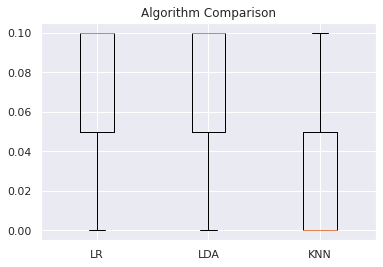

In [29]:
# Resplit the data sets into equal sizes for cross-validation purposes. 
# Then we will test 3 different models, Linear Regression, Linear
# Discriminant Analysis, and K-Nearest Neighbors. 
# Then, once we have tested each model, we will compare the training errors
# and decide which model to do a full analysis on. 

train = p['incident_type'].array[1:30,]
test = p['incident_type'].array[31:60,]
train = train.reshape(-1, 1)
test = test.reshape(-1, 1)

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))

results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=3, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, train, test, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [ ]:
# Here, we will make predictions on the test set using KNN, since it had the
# lowest training error, as seen above.

model = KNeighborsClassifier()
model.fit(train, test)
predictions = model.predict(train)

print(accuracy_score(test, predictions))
print(classification_report(test, predictions))

0.1724137931034483
              precision    recall  f1-score   support

           1       0.18      1.00      0.30         3
           6       0.20      1.00      0.33         1
           9       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          19       0.20      1.00      0.33         1
          21       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         1
          42       0.00      0.00      0.00         1
          46       0.00      0.00      0.00         1
          49       0.00      0.00      0.00         1
          53       0.00      0.00      0.00         1
          70       0.00      0.00      0.00         2
          72       0.00      0.00      0.00         1
          79       0.00      0.00      0.00         1
         104       0.00      0.00      0.00         1
         121       0.00      0.00      0.00         1
         136       0.00      0.00      0.00         1
        

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and